## Workflow stages

1. Question or problem definition.
2. Acquire data.
3. Analyze by describing data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

## Question or problem definition.

- to build an algorithm that automatically suggests the right product prices. 
- be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

https://www.kaggle.com/c/mercari-price-suggestion-challenge/overview/description

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os

# text mining
import nltk
import nltk.corpus
nltk.download('punkt')

# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [53]:
train = pd.read_csv('C:/Users/skim/Desktop/kaggle/mercari/data/mercari-price-suggestion-challenge/train.tsv', sep='\t')
test = pd.read_csv('C:/Users/skim/Desktop/kaggle/mercari/data/mercari-price-suggestion-challenge/test.tsv', sep='\t')
combine = [train, test]

## Analyze by describing data

In [55]:
print(train.shape)
print(test.shape)
print(train.columns.values)

(1482535, 8)
(693359, 7)
['train_id' 'name' 'item_condition_id' 'category_name' 'brand_name'
 'price' 'shipping' 'item_description']


In [57]:
print(train.head())

   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet 

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


## Analyze by pivoting features

In [59]:
train[['name', 'price']].groupby(['name'], as_index=False).mean().sort_values(by='price', ascending=False)

,name,price
706440,NEW Chanel WOC Caviar Gold Hardware,2009.0
714071,NEW-Chanel Boy Wallet o Chain WOC Caviar,2006.0
316772,David Yurman Wheaton ring,2004.0
270634,Chanel Classic Jumbo Single flap bag,2000.0
270631,Chanel Chevron Fuschia Pink 2,2000.0
...,...,...
944563,Sea Turtle Charm Necklace,0.0
406710,Frozen Elsa Dress,0.0
779421,Nike Dri-Fit High Power Speed Tights,0.0
698318,Mossimo denium shorts,0.0


In [60]:
train[['item_condition_id', 'price']].groupby(['item_condition_id'], as_index=False).mean().sort_values(by='price', ascending=False)

,item_condition_id,price
4,5,31.703859
1,2,27.563225
2,3,26.540711
0,1,26.486967
3,4,24.349212


In [61]:
train[['category_name', 'price']].groupby(['category_name'], as_index=False).mean().sort_values(by='price', ascending=False)

,category_name,price
963,Vintage & Collectibles/Antique/Furniture,195.000000
153,Handmade/Bags and Purses/Clutch,180.222222
89,Electronics/Computers & Tablets/Laptops & Netb...,177.089176
681,Kids/Strollers/Standard,163.666667
87,Electronics/Computers & Tablets/Desktops & All...,149.329412
...,...,...
288,Handmade/Knitting/Doll,5.000000
215,Handmade/Dolls and Miniatures/Artist Bears,5.000000
590,Kids/Diapering/Washcloths & Towels,4.000000
280,Handmade/Jewelry/Clothing,4.000000


In [62]:
train[['brand_name', 'price']].groupby(['brand_name'], as_index=False).mean().sort_values(by='price', ascending=False)

,brand_name,price
1222,Demdaco,429.000000
3465,Proenza Schouler,413.250000
346,Auto Meter,344.000000
3187,Oris,300.000000
2656,MCM Worldwide,289.173913
...,...,...
3819,Scunci,3.000000
3381,Play MG,3.000000
2285,Kae Argatherapie,3.000000
1795,Gossip Girl,0.000000


In [63]:
train[['shipping', 'price']].groupby(['shipping'], as_index=False).mean().sort_values(by='price', ascending=False)

,shipping,price
0,0,30.111778
1,1,22.567726


(array([1.472289e+06, 8.335000e+03, 1.169000e+03, 3.990000e+02,
        1.780000e+02, 6.500000e+01, 4.700000e+01, 2.100000e+01,
        1.600000e+01, 1.600000e+01]),
 array([   0. ,  200.9,  401.8,  602.7,  803.6, 1004.5, 1205.4, 1406.3,
        1607.2, 1808.1, 2009. ]),
 <a list of 10 Patch objects>)

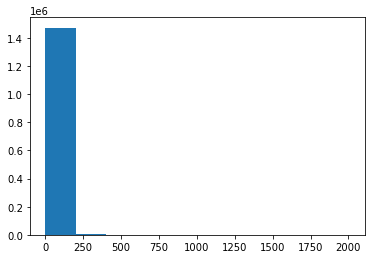

In [64]:
plt.hist(train.price)

## Add some columns and see deeply

(array([8.74000e+02, 1.87030e+04, 1.93836e+05, 6.20246e+05, 4.46867e+05,
        1.53715e+05, 3.83370e+04, 8.41300e+03, 1.34000e+03, 2.04000e+02]),
 array([0.      , 0.760589, 1.521178, 2.281767, 3.042356, 3.802945,
        4.563534, 5.324123, 6.084712, 6.845301, 7.60589 ]),
 <a list of 10 Patch objects>)

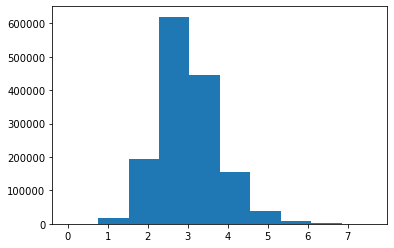

In [65]:
train['log_price'] = np.log1p(train['price'])
plt.hist(train.log_price)

In [66]:
train['category1'] = train.category_name.str.split('/').str[0]
train['category2'] = train.category_name.str.split('/').str[1]
train['category3'] = train.category_name.str.split('/').str[2]

11


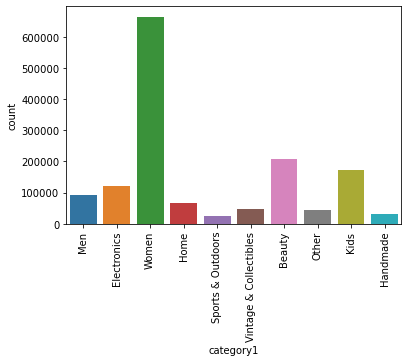

In [23]:
print(len(pd.unique(train['category1'])))
sns.countplot(x="category1", data=train)
plt.xticks(rotation=90)
plt.show()

In [24]:
train[['category1', 'price']].groupby(['category1'], as_index=False).mean().sort_values(by='price', ascending=False)

,category1,price
1,Electronics,35.173922
5,Men,34.708614
9,Women,28.885496
8,Vintage & Collectibles,27.339426
7,Sports & Outdoors,25.532219
3,Home,24.536599
6,Other,20.809817
4,Kids,20.642315
0,Beauty,19.671536
2,Handmade,18.156572


In [27]:
train_Women = train[train['category1']=='Women']
train_Women[['category2', 'price']].groupby(['category2'], as_index=False).mean().sort_values(by='price', ascending=False)

,category2,price
16,Women's Handbags,58.201648
8,Shoes,35.975610
1,Coats & Jackets,34.041360
15,Women's Accessories,30.930531
2,Dresses,29.445015
0,Athletic Apparel,28.844614
4,Jewelry,28.058633
11,Sweaters,26.503293
6,Other,26.012665
3,Jeans,25.885614


In [28]:
train_Women_Athletic = train_Women[train_Women['category2']=='Athletic Apparel']
train_Women_Athletic[['category3', 'price']].groupby(['category3'], as_index=False).mean().sort_values(by='price', ascending=False)

,category3,price
10,Tracksuits & Sweats,36.702572
0,Jackets,34.797082
3,"Pants, Tights, Leggings",34.392733
7,Snowsuits & Bibs,33.507937
11,Vests,32.000000
2,Other,31.631902
1,Jerseys,23.670157
6,"Skirts, Skorts & Dresses",22.560956
4,Shirts & Tops,22.450672
9,Sports Bras,19.718043


In [30]:
cnt = 0
for i in train_Women_Athletic.item_description:
    print(i[:100])
    print("_"*100)
    cnt += 1
    if cnt > 100:
        break

NWT Victoria's Secret ULTIMATE SPORT BRA -MAXIMUM SUPPORT SIZE 34ddd
____________________________________________________________________________________________________
Worn one time. Excellent condition
____________________________________________________________________________________________________
No description yet
____________________________________________________________________________________________________
One size fits sizes 2-12 92% polyester 8% spandex Super soft!! Capri leggings High waist 1in elastic
____________________________________________________________________________________________________
Brand new with tag and bag. French bulldog leggings. Hard to find this color background. Super soft!
____________________________________________________________________________________________________
Distressed Levi high waist jeans. Size XS, 12 slim in kids size
____________________________________________________________________________________________________
Highw

## From Descriptions

In [49]:
print(train_Women_Athletic.item_description.values)


["NWT Victoria's Secret ULTIMATE SPORT BRA -MAXIMUM SUPPORT SIZE 34ddd"
 'Worn one time. Excellent condition' 'No description yet' ...
 'NWOT - Blue - size 8'
 '▪️NWOT ▪️Perfect Condition ▪️Barely been worn ▪️No flaws ▪️Not Nike from Stadium Athletics ▪️No pockets, great for leisure wear'
 "Purple and Paisley Victoria's Secret Tankini Size Large. Worn a handful of times. Excellent Condition Free Shipping!"]


In [50]:
# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(train_Women_Athletic.item_description.values[1])

# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[('Worn', 1),
 ('one', 1),
 ('time', 1),
 ('.', 1),
 ('Excellent', 1),
 ('condition', 1)]

## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Random Forrest
- neural network

In [51]:
X_train = train.drop('price', axis=1)
Y_train = train['price']
X_test  = test.drop('test_id', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1482535, 11), (1482535,), (693359, 6))

In [52]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

ValueError: could not convert string to float: 'Wallets'

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [25]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

ValueError: Image size of 178848x216 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 178848x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 178848x216 with 828 Axes>

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

## Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission = pd.DataFrame({
        "test_id": test["test_id"],
        "price": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)